Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-10 01:19:06--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-10 01:19:07--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-10 01:19:07 (33.9 MB/s) -

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

CustomerID: Identificador único del cliente.

Gender: Género del cliente (Male/Female).

Age: Edad del cliente.

Annual Income (k$): Ingreso anual en miles de dólares.

Spending Score (1-100): Nivel de gasto asignado por el centro comercial.

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [5]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
X = data[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Porque K-means se basa en distancias; si las variables tienen escalas distintas, unas influirán más que otras.
Normalizar consiste en escalar las variables para que tengan media 0 y desviación estándar 1.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


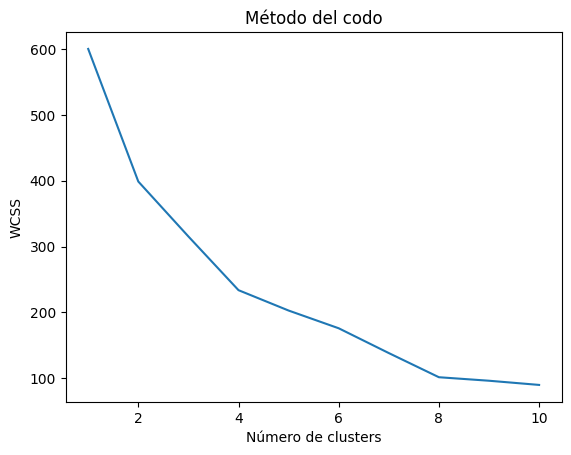

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El "codo" se forma en 5 clusters. Es el punto donde la disminución de WCSS se vuelve menos pronunciada.


Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        0  
1        0  
2        2  
3        4  
4        2  


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

Los clientes se agrupan según su género, ingreso y gasto.
Algunos clusters concentran personas con bajo ingreso y alto gasto; otros, con alto ingreso y bajo gasto, etc.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [8]:
cluster_analysis = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

cluster_analysis


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,40.510204,48.367347,55.510204
1,32.428571,88.228571,83.114286
2,45.611111,25.888889,17.055556
3,41.212121,89.030303,16.212121
4,37.984615,50.000000,54.907692


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Cada cluster tiene promedios distintos:

Unos tienen jóvenes con alto gasto.
Otros, mayores con ingreso medio.
Otros, clientes con bajo gasto e ingreso.
Cada grupo representa un perfil de consumo distinto.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

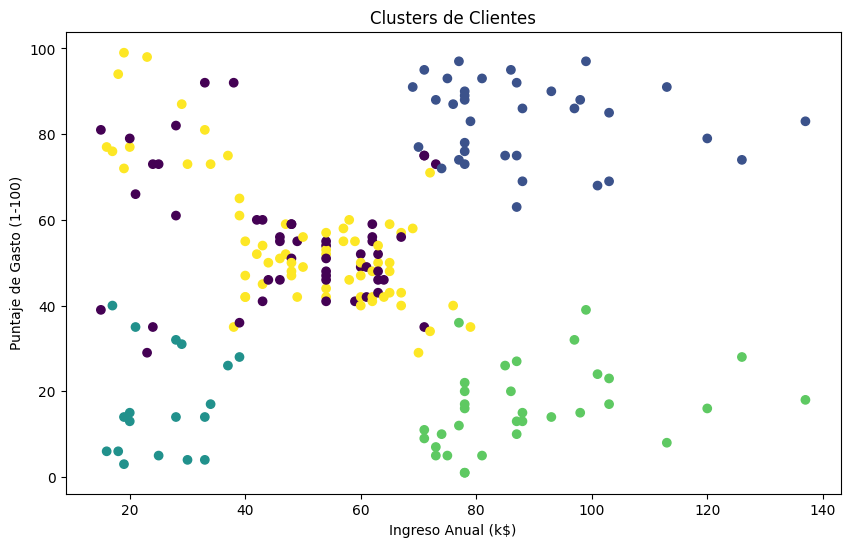

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

Los datos muestran grupos definidos pero no totalmente separados. Algunos clusters son más densos, lo que indica una mayor cohesión, mientras que en ciertas zonas los puntos se superponen, sugiriendo transiciones entre grupos. En general, hay una clara tendencia a la agrupación, aunque no perfecta.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [10]:

cluster_names = {
    0: "High Income, Low Spenders",
    1: "Low Income, Low Spenders",
    2: "Average Income, Average Spenders",
    3: "High Income, High Spenders",
    4: "Low Income, High Spenders" }

data['Cluster_Name'] = data['Cluster'].map(cluster_names)

print(data.groupby('Cluster_Name').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}))

                                        Age  Annual Income (k$)  \
Cluster_Name                                                      
Average Income, Average Spenders  45.611111           25.888889   
High Income, High Spenders        41.212121           89.030303   
High Income, Low Spenders         40.510204           48.367347   
Low Income, High Spenders         37.984615           50.000000   
Low Income, Low Spenders          32.428571           88.228571   

                                  Spending Score (1-100)  
Cluster_Name                                              
Average Income, Average Spenders               17.055556  
High Income, High Spenders                     16.212121  
High Income, Low Spenders                      55.510204  
Low Income, High Spenders                      54.907692  
Low Income, Low Spenders                       83.114286  


Los nombres reflejan combinaciones de ingresos y gasto. Hay grupos con altos ingresos y bajo gasto, bajos ingresos y bajo gasto, ingresos y gasto promedio, altos ingresos y alto gasto, y bajos ingresos pero alto gasto.